In [13]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from minisom import MiniSom
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('Mall_Customers.csv')

features = data[['Annual Income (k$)', 'Spending Score (1-100)']].values

# Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows wi

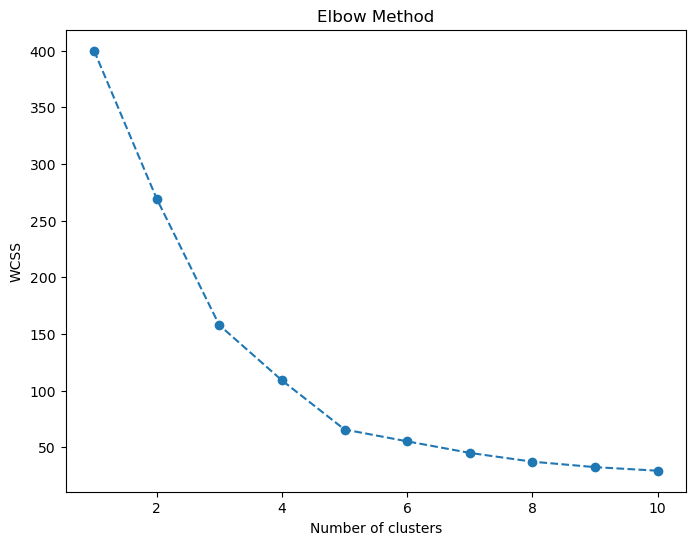

In [14]:
wcss = []  # Within-Cluster Sum of Squares

# Find the optimal number of clusters using the Elbow Method
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # Within-Cluster Sum of Squares
plt.show()


In [15]:
k = 2

# Create the K-Means model
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(scaled_features)

# Add the cluster labels to the original dataset
data['KMeans_Cluster'] = kmeans.labels_


c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [29]:
# Determine the SOM grid size (e.g., 1D array with the same number of clusters)
som = MiniSom(1, k, scaled_features.shape[1], sigma=1.0, learning_rate=0.5)
som.random_weights_init(scaled_features)

num_iterations = 10
som.train_batch(scaled_features, num_iterations)


cluster_labels = np.array([som.winner(x) for x in scaled_features])

data['SOM_Cluster'] = cluster_labels[:, 0]  


c:\Users\ASUS\anaconda3\Lib\site-packages\minisom.py:162: UserWarning: Warning: sigma is too high for the dimension of the map.
  warn('Warning: sigma is too high for the dimension of the map.')


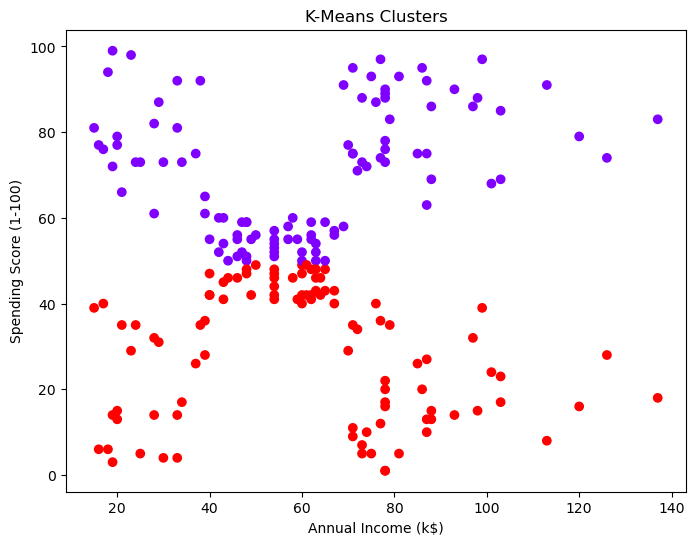

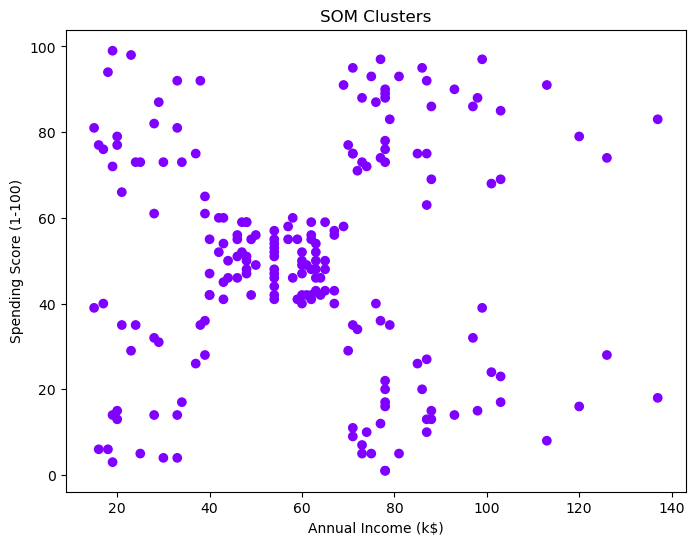

In [30]:
# Visualize the K-Means clusters
plt.figure(figsize=(8, 6))
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=data['KMeans_Cluster'], cmap='rainbow')
plt.title('K-Means Clusters')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

# Visualize the SOM clusters
plt.figure(figsize=(8, 6))
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=data['SOM_Cluster'], cmap='rainbow')
plt.title('SOM Clusters')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()
